In [1]:
##오차제곱합 구현하기

In [2]:
import numpy as np

In [3]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t) ** 2)

In [4]:
##정답이 2를 원 핫 인코딩으로 표현하기
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

##'2'일 확률이 높다고 출력된 결과(소프트맥스 사용)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
##'7'일 확률이 높다고 출력했을 경우
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

In [6]:
##교차엔트로피 구현
def cross_entropy_error(y, t):
    delta = 1e-7  ##log가 무한으로 가지 않기 위하여 아주 작은 값을 더함
    return -np.sum(t * np.log(y + delta))

In [7]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [8]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [9]:
##MNIST 데이터셋 불러오기
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

##각 데이터의 형상 출력

print(x_train.shape)
print(t_train.shape)
print(x_test.shape, '\n', t_test.shape)

(60000, 784)
(60000, 10)
(10000, 784) 
 (10000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [11]:
##배치용 교차 엔트로피 구현하기
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y +1e-7)) / batch_size

In [12]:
##정답이 숫자 레이블로 주어졌을때의 교차엔트로피 오차
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [13]:
##미분 구현하기

In [14]:
##구현의 안 좋은 예 (반올림 오차와 전방 차분의 문제)
def numerical_diff(f, x):
    h = 10e-50  ##아주 작은 값을 대입하여 lim h->0을 표현
    return (f(x + h) - f(x)) / h

In [15]:
##개선해서 구현
def numerical_diff(f, x):
    h = 1e-4 #0.0001
    return (f(x + h) - f(x - h)) / (2*h)

In [16]:
##2차 함수 수치 미분해보기

In [17]:
##2차 함수 구현
def function_1(x):
    return 0.01*x**2 + 0.1*x

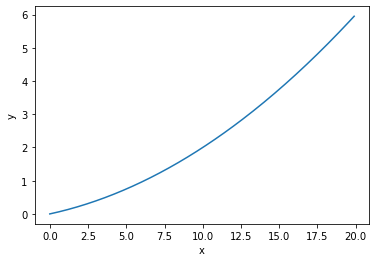

In [18]:
##해당 함수 그래프 그려보기
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1) ##0.0부터 20.0까지 0.1 간격으로 배열 생성
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [19]:
## x=5일때 함수의 미분 계산
numerical_diff(function_1, 5)

0.1999999999990898

In [20]:
## 10일때
numerical_diff(function_1, 10)

0.2999999999986347

In [21]:
## 편미분

In [22]:
def function_2(x):
    return x[0]**2 + x[1]**2  ## 변수가 2개이다
    ## return np.sum(x**2) 와 동일

In [23]:
## x[0] = 3, x[1] = 4 일때 x[0]의 편미분 구하기
def function_tmp1(x0):
    return x0**2 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [24]:
## x[0] = 3, x[1] = 4 일때 x[1]의 편미분 구하기
def function_tmp2(x1):
    return 3.0**2.0 + x1**2

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [25]:
##기울기 구하기
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 같은 형상이고 값은 0인 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #값 복원

    return grad

In [26]:
## (3,4), (0, 2), (3, 0)의 기울기 구하기
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


No handles with labels found to put in legend.


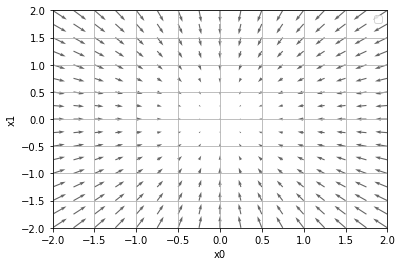

In [27]:
##기울기 결과에 마이너스를 붙인 벡터(화살표) 그려보기
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 같은 형상이고 값은 0인 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #값 복원

    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]) )

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

In [28]:
## 경사 하강법 구현하기

In [29]:
def gradient_descent(f, init_x, lr=0.01, step_num=100): # lr은 learning rate(학습률), init_x는 초기값, f는 최적화하려는 함수, step_num은 경사법에 따른 반복 횟수
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [30]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

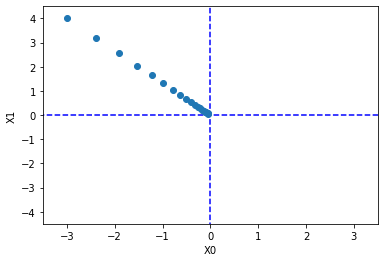

In [31]:
##경사법을 사용한 갱신과정을 그래프화 하기
# from gradient_2d import numerical_gradient

def gradient_descent_history(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent_history(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0, 0], '--b')
plt.plot( [0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [32]:
## 학습률이 너무 큰 경우
def function_2(x):
    return x[0]**2 + x[1]**2

gradient_descent(function_2, init_x=np.array([-3.0, 4.0]), lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [33]:
## 학습률이 너무 작은 경우
gradient_descent(function_2, init_x=np.array([-3.0, 4.0]), lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [34]:
## 간단한 신경망 구현하기

import sys, os
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  ## 정규분포 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss
        

In [35]:
net = simpleNet()
print(net.W)  ## 가중치 매개변수

[[-0.29304964  0.05734067 -0.1195198 ]
 [-1.04354299  0.08685406  0.40416992]]


In [36]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))
t = np.array([0, 0, 1])
net.loss(x, t)

[-1.11501848  0.11257305  0.29204104]
2


0.7326450218558942

In [37]:
## 기울기 구하기

# 더미 함수
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.07061374  0.24100465 -0.31161839]
 [ 0.10592061  0.36150697 -0.46742758]]


In [38]:
## 람다(lambda) 기법

f = lambda w: net.loss(x, t)  ## 위의 더미 함수와 동일

In [39]:
## 2층 신경망 구현하기

In [40]:
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x: 입력 데이터, t: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    # 성능 개선판!
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [41]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [42]:
# 예측 처리
x = np.random.rand(100, 784)
y = net.predict(x)

In [43]:
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [44]:
t = np.random.rand(100, 10)

grads = net.gradient(x, t) # 기울기 계산

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [45]:
## 신경망 미니배치

train acc, test acc | 0.10243333333333333, 0.1013
train acc, test acc | 0.7931666666666667, 0.7945
train acc, test acc | 0.8736166666666667, 0.8783
train acc, test acc | 0.8973, 0.903
train acc, test acc | 0.9078, 0.9098
train acc, test acc | 0.9143, 0.9169
train acc, test acc | 0.9196833333333333, 0.9225
train acc, test acc | 0.9239833333333334, 0.9259
train acc, test acc | 0.9275333333333333, 0.9307
train acc, test acc | 0.93055, 0.9312
train acc, test acc | 0.9344333333333333, 0.9347
train acc, test acc | 0.93665, 0.9363
train acc, test acc | 0.9385833333333333, 0.9382
train acc, test acc | 0.9413666666666667, 0.9397
train acc, test acc | 0.9433666666666667, 0.9421
train acc, test acc | 0.9452, 0.9429
train acc, test acc | 0.9467, 0.9435


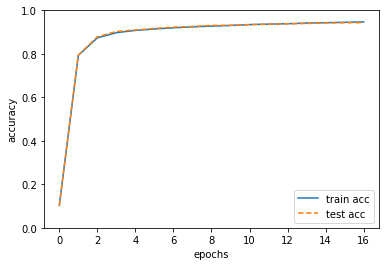

In [46]:
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100   # 미니 배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []


# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에퐄당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()